# Triceratops - Two Sectors
This is essentially the same as the single sector version but with two sectors of data
See that notebook for detailed comments on what is going on!

In [1]:
import numpy as np
import pandas as pd
import time
import lightkurve as lk
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
import os
from pathlib import Path
%matplotlib inline

import triceratops.triceratops as tr

def savedf (TIC_no,df,index=0):
    # Create directory to store the images
    path = Path("{}_triceratops".format(TIC_no))
    filename = "{}_triceratops_{}.csv".format(TIC_no,index)
    full_filename = path / filename
    try:
        os.mkdir(path)
    except OSError:
        pass
        #print ("Directory %s already exists or failed to create it" % path)
    else:
        pass
        #print ("Successfully created the directory %s " % path)
        
    try:
        os.remove(full_filename)
    except OSError:
        pass
        #print ("File does not exist " + pltfile)
    else:
        pass
        #print ("Deleted old file " + pltfile)
    df.to_csv(full_filename)
    print ("Saved {}".format(full_filename))

In [6]:
TIC_no = 161477033
T0 = 1416.409994808922
P_orb = 40.88948283627428
Depth = 0.0012240335935074231
sector1 = 4
sector2 = 5
sectors = np.array([sector1,sector2])
folding_period = P_orb
print("Done")

In [7]:
# Get the Trilegal data first - avoids need to keep going to get it and hence timeouts
from astroquery.mast import Catalogs, Tesscut
import astropy.units as u
trilegal_file = str(TIC_no) + "_TRILEGAL.csv"
if os.path.exists(trilegal_file) == True:
    print("File already exists: {}".format(trilegal_file))
    trilegal_fname = trilegal_file
else:
    ticid = TIC_no
    search_radius: int = 10
    pixel_size = 20.25*u.arcsec
    df = Catalogs.query_object(
        "TIC"+str(ticid),
        radius=search_radius*pixel_size,
        catalog="TIC"
        )
    new_df = df[
        "ID", "Tmag", "Jmag", "Hmag", "Kmag",
        "ra", "dec", "mass", "rad", "Teff", "plx"
        ]
    stars = new_df.to_pandas()

    trilegal_url = tr.query_TRILEGAL(
        stars["ra"].values[0],
        stars["dec"].values[0],
        verbose=0
        )
    print(trilegal_url)  # Go and check this URL in a browser

Querying TRILEGAL
http://stev.oapd.inaf.it/tmp/output589768738559.dat


In [9]:
# Wait until it is done before running this!
trilegal_fname = tr.save_trilegal(trilegal_url, TIC_no)

Saving TRILEGAL http://stev.oapd.inaf.it/tmp/output589768738559.dat


In [10]:
%%time
TIC = 'TIC ' + str(TIC_no)
target = tr.target(ID=TIC_no, sectors=sectors, trilegal_fname=trilegal_fname)
target

CPU times: user 1min 15s, sys: 609 ms, total: 1min 16s
Wall time: 1min 26s


TIC 161477033 [4 5]
11


/home/ian/.local/lib/python3.8/site-packages/lightkurve/search.py:346: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


11
Sector 4


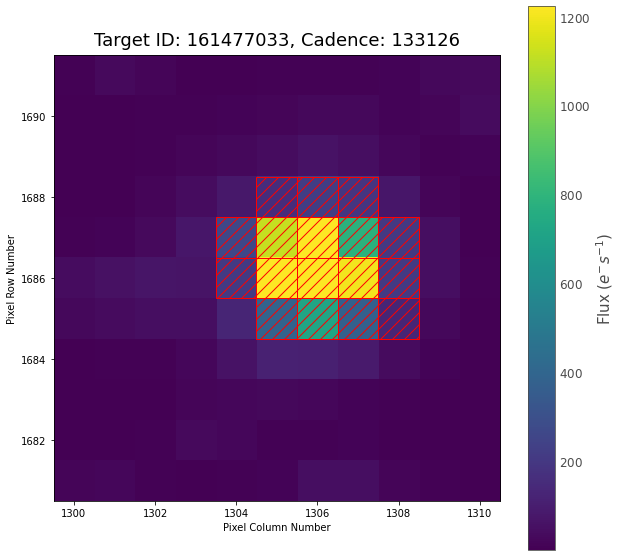

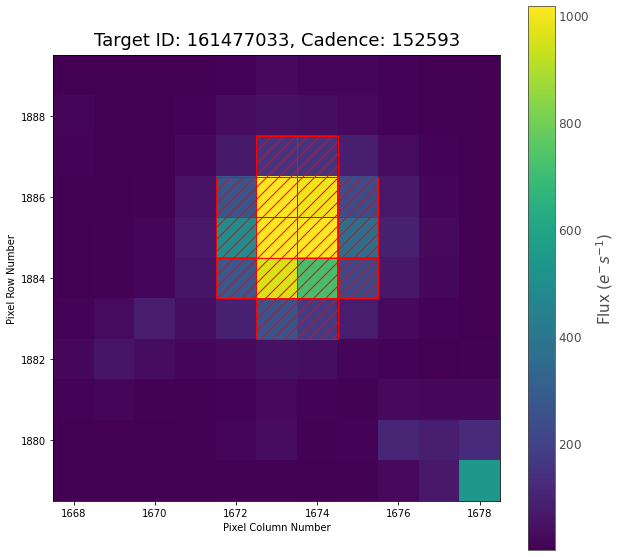

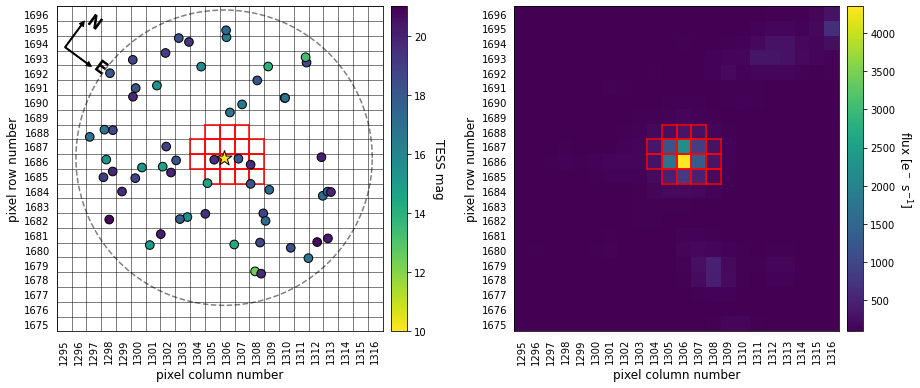

Sector 5


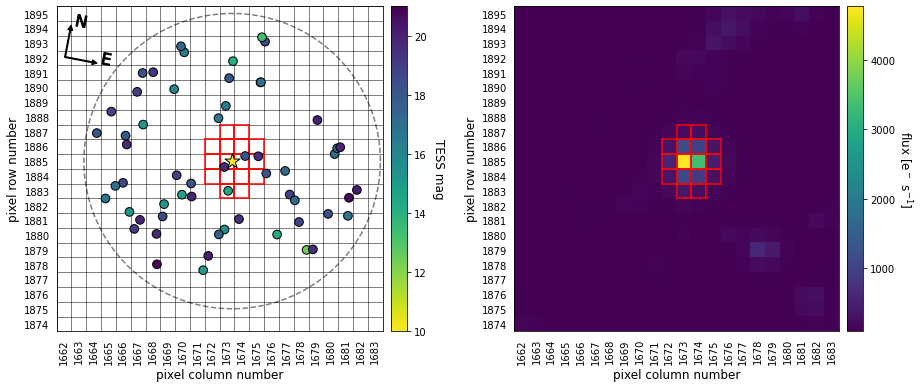

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,161477033,10.0614,9.370,9.012,8.950,73.260975,-45.540695,0.91,0.879477,5286.00,9.216760,0.000,0.000
1,685600140,19.5539,NaN,NaN,NaN,73.257262,-45.543577,NaN,NaN,NaN,-0.568353,13.974,222.058
2,161477036,18.1320,16.795,16.124,16.462,73.267662,-45.537765,NaN,NaN,3908.00,1.572250,19.889,57.970
3,685600138,19.6370,NaN,NaN,NaN,73.274974,-45.536887,NaN,NaN,NaN,1.953540,37.867,68.780
4,161477031,14.5559,13.960,13.600,13.579,73.261923,-45.552593,1.03,1.171650,5741.00,0.726898,42.897,176.806
5,161477032,18.1977,16.888,16.023,15.816,73.281235,-45.543024,NaN,NaN,3895.00,1.000450,51.766,99.326
6,161477038,16.6273,15.963,15.597,15.380,73.248827,-45.524939,1.17,1.016320,6162.00,0.204802,64.466,331.623
7,685600139,18.1896,NaN,NaN,NaN,73.240596,-45.552446,NaN,NaN,5396.00,0.260094,66.553,230.528
8,685600034,19.9214,NaN,NaN,NaN,73.242280,-45.557489,NaN,NaN,NaN,0.211623,76.658,217.932
9,161477034,17.2871,16.012,15.583,15.368,73.291414,-45.540655,0.66,0.849050,4215.00,0.489017,76.751,89.904


In [12]:
print(TIC, sectors)
apertures = []
tpfs = []
# Loop through the sectors
for i in range(len(sectors)):
    # we need to use 'search_targetpixelfile'
    search_result = lk.search_targetpixelfile(TIC,  sector=sectors[i])
    if len(search_result) > 0:
        # download the data
        try:
            tpf = search_result.download()
            #print(tpf)
            # plot the data (the aperture_mask='pipeline' command tells it to plot the red hatched aperture)
            fig, axap = plt.subplots(figsize = (10,10))
            tpf.plot(ax=axap,frame=1000,aperture_mask='pipeline') #Use if frame 0 is NaN
            tpf.wcs.pixel_to_world(0, 0)
        except Exception as e:
            print("An error occurred: {}".format(e))
    else:
        print("No TPF found for {} sector {}".format(TIC, sector_no))
    mask = tpf.pipeline_mask

    size = len(tpf.pipeline_mask)
    print(size)
    # Create an array of the row and column addresses of the mask for use in triceratops
    x=size-1
    #x=16 # override for odd shaped windows
    ap = []
    while x >= 0:
        y=size-1
        #y=10 # override for odd shaped windows
        while y >= 0:
            if mask[x][y] == True:
                ap.append([tpf.column+y,tpf.row+x])
            y -= 1
        x -= 1
    apertures.append(ap)   
    tpfs.append(tpf)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)
target.stars

In [13]:
target.calc_depths(tdepth=Depth, all_ap_pixels=apertures)
target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,161477033,10.0614,9.370,9.012,8.950,73.260975,-45.540695,0.91,0.879477,5286.00,9.216760,0.000,0.000,9.906270e-01,0.001236
1,685600140,19.5539,NaN,NaN,NaN,73.257262,-45.543577,NaN,NaN,NaN,-0.568353,13.974,222.058,1.502382e-04,0.000000
2,161477036,18.1320,16.795,16.124,16.462,73.267662,-45.537765,NaN,NaN,3908.00,1.572250,19.889,57.970,5.679669e-04,0.000000
3,685600138,19.6370,NaN,NaN,NaN,73.274974,-45.536887,NaN,NaN,NaN,1.953540,37.867,68.780,1.128553e-04,0.000000
4,161477031,14.5559,13.960,13.600,13.579,73.261923,-45.552593,1.03,1.171650,5741.00,0.726898,42.897,176.806,7.742327e-03,0.158096
5,161477032,18.1977,16.888,16.023,15.816,73.281235,-45.543024,NaN,NaN,3895.00,1.000450,51.766,99.326,2.230019e-04,0.000000
6,161477038,16.6273,15.963,15.597,15.380,73.248827,-45.524939,1.17,1.016320,6162.00,0.204802,64.466,331.623,3.240711e-04,0.000000
7,685600139,18.1896,NaN,NaN,NaN,73.240596,-45.552446,NaN,NaN,5396.00,0.260094,66.553,230.528,3.858178e-05,0.000000
8,685600034,19.9214,NaN,NaN,NaN,73.242280,-45.557489,NaN,NaN,NaN,0.211623,76.658,217.932,1.916044e-06,0.000000
9,161477034,17.2871,16.012,15.583,15.368,73.291414,-45.540655,0.66,0.849050,4215.00,0.489017,76.751,89.904,7.773353e-05,0.000000


/home/ian/.local/lib/python3.8/site-packages/lightkurve/search.py:346: LightkurveWarning: Warning: 6 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/ian/.local/lib/python3.8/site-packages/lightkurve/search.py:346: LightkurveWarning: Warning: 6 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


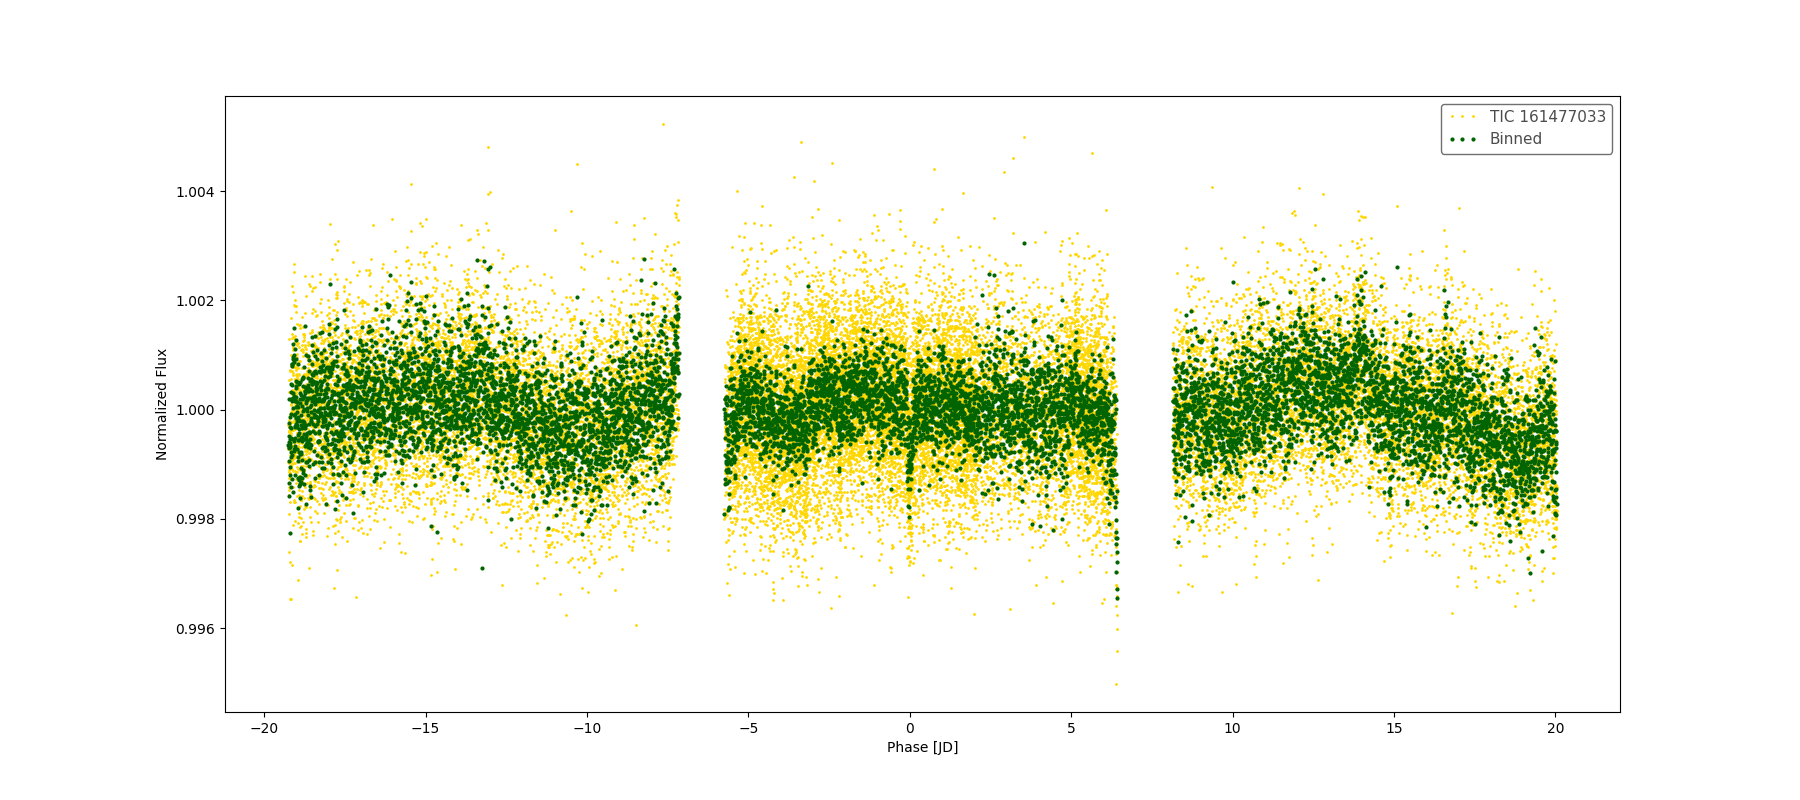

In [14]:
# Lightcurve from TPF data for the sectors
#lc1 = tpfs[0].to_lightcurve(aperture_mask=tpfs[0].pipeline_mask).normalize()
#lc = lc1.append(tpfs[1].to_lightcurve(aperture_mask=tpfs[1].pipeline_mask).normalize())

# If TPF data is all over the place try using PDCSAP (this is processed though so results may be affected by that)
sector_data1 = lk.search_lightcurve(TIC,sector=sector1)
lc1 = sector_data1.download().normalize()
sector_data2 = lk.search_lightcurve(TIC,sector=sector2)
lc = lc1.append(sector_data2.download().normalize())

lc = lc.remove_outliers().fold(folding_period,T0) # Uncomment to fold the light curve - P_orb needs to be a single value!
time = lc.time.value
#lc_binsize = (time.max()-time.min())/1000
lc_binsize = 5/24/60

%matplotlib widget
plt.style.use('default')
fig, ax = plt.subplots(figsize = (18,8))

# now plot both the binned and unbinned data 
lc.plot(ax = ax, linewidth = 0, marker = 'o', color = 'gold', markersize = 1)
lc.bin(lc_binsize).plot(ax = ax, label='Binned', linewidth = 0, marker = 'o', color = 'darkgreen', markersize = 2)
plt.show()

# Define the functions to allow the user to click on points in the chart 
import ipywidgets as widgets
from IPython.display import clear_output
coords = []
tran = []

def onclick_dip(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata
    if event.button == 3:  # Right click
        global coords    
        if len(coords) < 2: # Start and end
            coords.append((ix, iy))
            tran.append(plt.axvline(ix, color = 'blue', zorder = -1))  
            
cid = fig.canvas.mpl_connect('button_press_event', onclick_dip)  # Connect the event            
            
# Create a reset button
button_reset = widgets.Button(description='Reset', button_style='warning')

out_op = widgets.Output()  # Output from the button actions

# Define reset button code
def on_reset_button_clicked(_):
    global coords, tran
    with out_op:
        clear_output()
        for line in tran:
            try: 
                line.remove()
            except:
                pass
        tran.clear()   
        coords.clear()
        
# link button and function together using a button's method
button_reset.on_click(on_reset_button_clicked)  

# Create a button to complete the process
button_op = widgets.Button(description='Done', button_style='primary')

# Define to 'done' button actions
def on_op_button_clicked(_):
    global coords
    global transit_start, transit_end, transit_mid
    with out_op:
        clear_output()
        if len(coords) < 2:
            print("Select two dips before continuing")
        else:
            transit_start = coords[0][0] 
            transit_end = coords[1][0] 
            transit_length = (transit_end-transit_start) * 24
            if transit_length < 0 : transit_length *= -1  # In case we choose the wrong way round
            transit_mid = transit_start+(transit_end-transit_start)/2
            print(transit_start, transit_end, transit_mid)
# link button and function together using a button's method
button_op.on_click(on_op_button_clicked)    

# Create and display a display box containing the buttons and the output region
boxop = widgets.VBox([button_reset,button_op,out_op ])
boxop

In [15]:
# Calculate SNR
# ==============
no_transits = 2
cadence_period = 2
# ==============
import numpy as np
import scipy.io
lc1 = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask).flatten().normalize()
transit_duration =  transit_end - transit_start
cadences = int(transit_duration*24*60/cadence_period)
cdpp = lc1.estimate_cdpp(transit_duration=cadences) 
depth_ppm = Depth * 1000000
print("Dip depth = {} CDPP = {} Cadences = {} Transits = {}".format(depth_ppm,cdpp,cadences,no_transits))
snr = ((depth_ppm)/cdpp.value) * np.sqrt(no_transits)
print("SNR = {:.2f}".format(snr))

Dip depth = 1224.0335935074231 CDPP = 33.30665052301602 ppm Cadences = 140 Transits = 2
SNR = 51.97


        time                flux               flux_err           time_bin_start      time_bin_size   
                                                                                            s         
-------------------- ------------------ ---------------------- -------------------- ------------------
-0.19668700269355516 1.0008761882781982 0.00044529768638312817 -0.19842311380466626  299.9999999999989
-0.19321478047133295 1.0006963014602661  0.0004454344976693392 -0.19495089158244405  300.0000000000013
 -0.1897425582491107  1.000185251235962 0.00044508357532322405 -0.19147866936022181  299.9999999999989
 -0.1862703360268885  1.000106692314148  0.0004453111905604601  -0.1880064471379996  300.0000000000013
-0.18279811380466626 0.9998029470443726  0.0004451227840036154 -0.18453422491577737  299.9999999999989
-0.17932589158244405 1.0001952648162842 0.00044538951478898523 -0.18106200269355516  300.0000000000013
-0.17585366936022181 0.9996225237846375 0.00044513554312288763 -0.1775897

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux'>

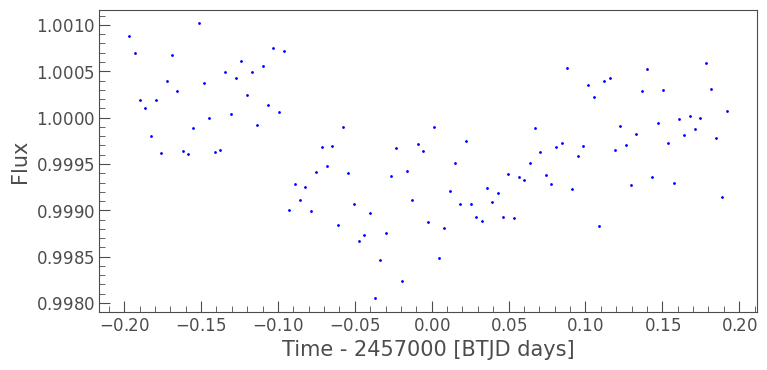

In [16]:
%matplotlib inline
mid_point = T0
lead_time = transit_duration/2
dip_mask = (time > (transit_start-lead_time)) * (time < (transit_end+lead_time)) 

time, flux, flux_err = lc.time.value[dip_mask], lc.flux.value[dip_mask], lc.flux_err.value[dip_mask]

lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)
print(lc)
lc.plot(linewidth = 0, marker = 'o', color = 'blue', markersize = 1)

In [17]:
%%time
target.calc_probs(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value), P_orb=P_orb, parallel=True)

Calculating TP scenario probabilitiey for 161477033.
Calculating EB and EBx2P scenario probabilities for 161477033.
Calculating PTP scenario probability for 161477033.
Calculating PEB and PEBx2P scenario probabilities for 161477033.
Calculating STP scenario probability for 161477033.
Calculating SEB and SEBx2P scenario probabilities for 161477033.
Calculating DTP scenario probability for 161477033.
Calculating DEB and DEBx2P scenario probabilities for 161477033.
Calculating BTP scenario probability for 161477033.
Calculating BEB and BEBx2P scenario probabilities for 161477033.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 161477031.
CPU times: user 1min 42s, sys: 1.04 s, total: 1min 43s
Wall time: 39.6 s


In [18]:
df_results = target.probs
print("FPP =", np.round(target.FPP, 4))
print("NFPP =", np.round(target.NFPP, 4))
pd.options.display.max_columns = None
pd.options.display.max_rows = None
#df_results.to_csv("{}_triceratops.csv".format(TIC_no))
savedf(TIC_no,df_results)
df_results

FPP = 0.0297
NFPP = 0.0023
Saved 161477033_triceratops/161477033_triceratops_0.csv


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,161477033,TP,0.910000,0.879477,40.889483,89.853778,0.107887,0.278739,46.053173,2.548950,0.000000,0.000000,7.815608e-01
1,161477033,EB,0.910000,0.879477,40.889483,87.700370,1.882857,0.361798,42.630534,0.000000,0.748299,0.778667,1.375773e-30
2,161477033,EBx2P,0.910000,0.879477,81.778966,89.243689,1.300215,0.353882,184.081946,0.000000,0.895128,0.879477,3.109007e-13
3,161477033,PTP,0.910000,0.879477,40.889483,89.748872,0.216338,0.208354,18.638514,2.678206,0.000000,0.000000,1.494129e-01
4,161477033,PEB,0.910000,0.879477,40.889483,89.092658,0.875670,0.206017,183.591514,0.000000,0.101228,0.121759,1.260921e-24
5,161477033,PEBx2P,0.910000,0.879477,81.778966,89.403599,0.568035,0.733182,185.520950,0.000000,0.890911,0.879477,2.412508e-07
6,161477033,STP,0.738079,0.768957,40.889483,89.531665,0.565957,0.181048,276.182409,4.245657,0.000000,0.000000,2.515195e-02
7,161477033,SEB,0.139930,0.170599,40.889483,89.995551,0.007974,0.613320,175.280474,0.000000,0.066157,0.100000,7.574787e-04
8,161477033,SEBx2P,0.154123,0.185920,81.778966,89.855985,0.498028,0.461703,162.053066,0.000000,0.152743,0.184477,2.218149e-05
9,161477033,DTP,0.910000,0.879477,40.889483,89.951494,0.042399,0.216544,12.633095,2.539830,0.000000,0.000000,3.933428e-02


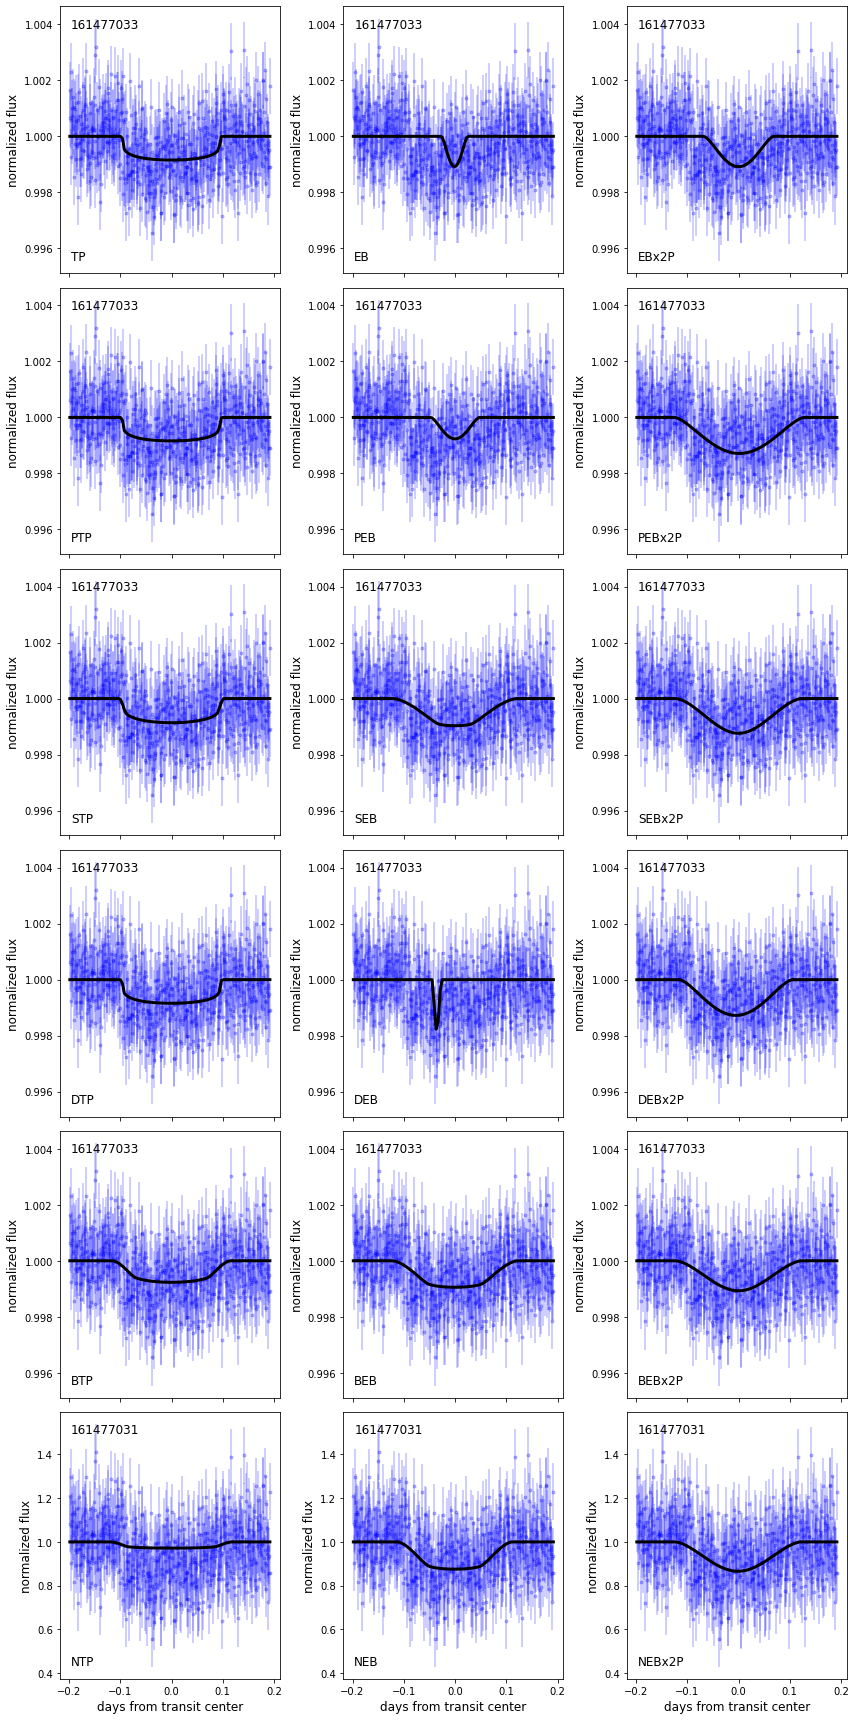

In [19]:
target.plot_fits(time=time, flux_0=flux, flux_err_0=flux_err)

In [13]:
%%time
Runs = 10
FPPs = []
NFPPs = []
for i in range(Runs):
    target.calc_probs(time=lc.time.value,
                      flux_0=lc.flux.value,
                      flux_err_0=np.mean(lc.flux_err.value),
                      P_orb=P_orb,
                      parallel=True,
                      verbose=True)
    FPPs.append(target.FPP)
    NFPPs.append(target.NFPP)
    meanFPP = np.round(np.mean(FPPs), 4)
    stdvFPP = np.round(np.std(FPPs), 4)
    meanNFPP = np.round(np.mean(NFPPs), 4)
    stdvNFPP = np.round(np.std(NFPPs), 4)
    print("After {} FPP = {} +/- {} NFPP = {} +/- {} ".format(i+1, meanFPP, stdvFPP, meanNFPP, stdvNFPP))
    df_results = target.probs
    savedf(TIC_no,df_results,i+1)

Calculating TP scenario probabilitiey for 9707944.
Calculating EB and EBx2P scenario probabilities for 9707944.
Calculating PTP scenario probability for 9707944.
Calculating PEB and PEBx2P scenario probabilities for 9707944.
Calculating STP scenario probability for 9707944.
Calculating SEB and SEBx2P scenario probabilities for 9707944.
Calculating DTP scenario probability for 9707944.
Calculating DEB and DEBx2P scenario probabilities for 9707944.
Calculating BTP scenario probability for 9707944.
Calculating BEB and BEBx2P scenario probabilities for 9707944.
After 1 FPP = 0.0101 +/- 0.0 NFPP = 0.0 +/- 0.0 
Saved 9707944_triceratops/9707944_triceratops_1.csv
Calculating TP scenario probabilitiey for 9707944.
Calculating EB and EBx2P scenario probabilities for 9707944.
Calculating PTP scenario probability for 9707944.
Calculating PEB and PEBx2P scenario probabilities for 9707944.
Calculating STP scenario probability for 9707944.
Calculating SEB and SEBx2P scenario probabilities for 970794

In [14]:
meanFPP = np.round(np.mean(FPPs), 4)
stdvFPP = np.round(np.std(FPPs), 4)
meanNFPP = np.round(np.mean(NFPPs), 4)
stdvNFPP = np.round(np.std(NFPPs), 4)

path = Path("{}_triceratops".format(TIC_no))
summary_filename = "{}_triceratops_summary.txt".format(TIC_no)
summary_full_filename = path / summary_filename
with open(summary_full_filename, "w") as f:
    #writer = csv.writer(f, delimiter='\t')
    print("FPPs:")
    f.write("Triceratops summary for {}: Sectors: {} T0: {} Period: {}\n".format(TIC_no, sectors, T0, P_orb))
    f.write("FPPs:\n")
    for fpp in FPPs:
        f.write("{:.4f}{}".format(fpp,"\n"))
        print("{:.4f}".format(fpp))
    f.write("Mean FPP = {} +/- {}\n".format(meanFPP, stdvFPP))
    print("Mean FPP = {} +/- {}".format(meanFPP, stdvFPP))
    f.write("Mean NFPP = {} +/- {}\n".format(meanNFPP, stdvNFPP))
    print("Mean NFPP = {} +/- {}".format(meanNFPP, stdvNFPP))    
f.close()
print("Created {}".format(summary_full_filename))

FPPs:
0.0101
0.0127
0.0118
0.0093
0.0102
0.0126
0.0103
0.0077
0.0128
0.0106
Mean FPP = 0.0108 +/- 0.0016
Mean NFPP = 0.0 +/- 0.0
Created 9707944_triceratops/9707944_triceratops_summary.txt


In [15]:
# Read all the files and calculate means and sds for each scenario
import pandas as pd
import numpy as np
# First read the files into data frames
df = []
for i in range(Runs):
    try:
        df.append( pd.read_csv('{}_triceratops/{}_triceratops_{}.csv'.format(TIC_no,TIC_no,i+1)))
        #print(df[i].to_string()) 
    except:
        pass
    
# Extract the scenarios and probabilities into arrays
id = []
scenario = []
prob = []
for i in range(len(df)):
    id.append(np.array(df[i]['ID']))
    scenario.append(np.array(df[i]['scenario']))
    prob.append(np.array(df[i]['prob']))
    
# Get the list of scenarios
scenarios = scenario[0]
ids = id[0]

# Go through each of the data sets, look for the probablilty for each scenario and put them into array where mean and sd can be calculated
probs = np.zeros((len(scenarios),len(df)))
for i in range(len(scenario)):  # For each data set
    for j in range(len(scenarios)):  # Look for each scenario
        if scenario[i][j] == scenarios[j]: # When found add the probability value to the array
            #print(scenario[i][j], prob[i][j])
            probs[j][i] = prob[i][j]

# Publish the results
path = Path("{}_triceratops".format(TIC_no))
summary_filename = "{}_triceratops_summary.txt".format(TIC_no)
summary_full_filename = path / summary_filename
with open(summary_full_filename, "a") as f:
    print("Mean values over {} runs:".format(len(df)))
    f.write("\nMean values over {} runs:\n".format(len(df)))
    print("{:10} {:8}\t{:6}\t{:6}".format("ID","Scenario","Prob","+/-"))   
    f.write("{:10} {:8}\t{:6}\t{:6}\n".format("ID","Scenario","Prob","+/-"))   
    for i in range(len(scenarios)):
        scenario_mean = np.round(np.mean(probs[i]), 3)
        scenario_sd = np.round(np.std(probs[i]), 3)
        print("{:10s} {:8}\t{:6.4f}\t{:6.4f}".format(str(ids[i]),scenarios[i], scenario_mean, scenario_sd))
        f.write("{:10s} {:8}\t{:6.4f}\t{:6.4f}\n".format(str(ids[i]),scenarios[i], scenario_mean, scenario_sd))

f.close()
print("Updated {}".format(summary_full_filename))

Mean values over 10 runs:
ID         Scenario	Prob  	+/-   
9707944    TP      	0.7810	0.0140
9707944    EB      	0.0000	0.0000
9707944    EBx2P   	0.0000	0.0000
9707944    PTP     	0.1500	0.0090
9707944    PEB     	0.0000	0.0000
9707944    PEBx2P  	0.0000	0.0000
9707944    STP     	0.0100	0.0010
9707944    SEB     	0.0000	0.0000
9707944    SEBx2P  	0.0000	0.0000
9707944    DTP     	0.0580	0.0070
9707944    DEB     	0.0000	0.0000
9707944    DEBx2P  	0.0000	0.0000
9707944    BTP     	0.0000	0.0000
9707944    BEB     	0.0000	0.0000
9707944    BEBx2P  	0.0000	0.0000
Updated 9707944_triceratops/9707944_triceratops_summary.txt
